In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
# Step 1: Data Acquisition
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&outputsize=full&apikey=AFIY6TARCA5RULA7'
response = requests.get(url)
data = response.json()

In [3]:
# Step 2: Data Pre-processing
# Convert the nested JSON data to a pandas DataFrame
df = pd.DataFrame(data['Time Series (5min)']).T

# Rename columns for clarity
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Convert string values to appropriate data types
df = df.astype({'Open': float, 'High': float, 'Low': float, 'Close': float, 'Volume': int})

# Convert the index (timestamps) to datetime format
df.index = pd.to_datetime(df.index)

In [4]:
# Step 3: Loading into a database (SQLite)
# Establish a connection to the SQLite database
engine = create_engine('sqlite:///stock_data.db')

# Store the DataFrame in the database table
table_name = 'stock_data'
df.to_sql(table_name, engine, if_exists='replace')

2824

In [5]:
# Step 4: Data Analysis
# Perform data analysis based on the questions of interest
# Calculate the average closing price over the entire dataset
average_closing_price_query = f"SELECT AVG(Close) FROM {table_name}"
average_closing_price = engine.execute(average_closing_price_query).scalar()
print("Average Closing Price: ", average_closing_price)

# Calculate the maximum volume traded in a single 5-minute interval
max_volume_query = f"SELECT MAX(Volume) FROM {table_name}"
max_volume = engine.execute(max_volume_query).scalar()
print("Maximum Volume: ", max_volume)

Average Closing Price:  133.7156267705385
Maximum Volume:  7763841


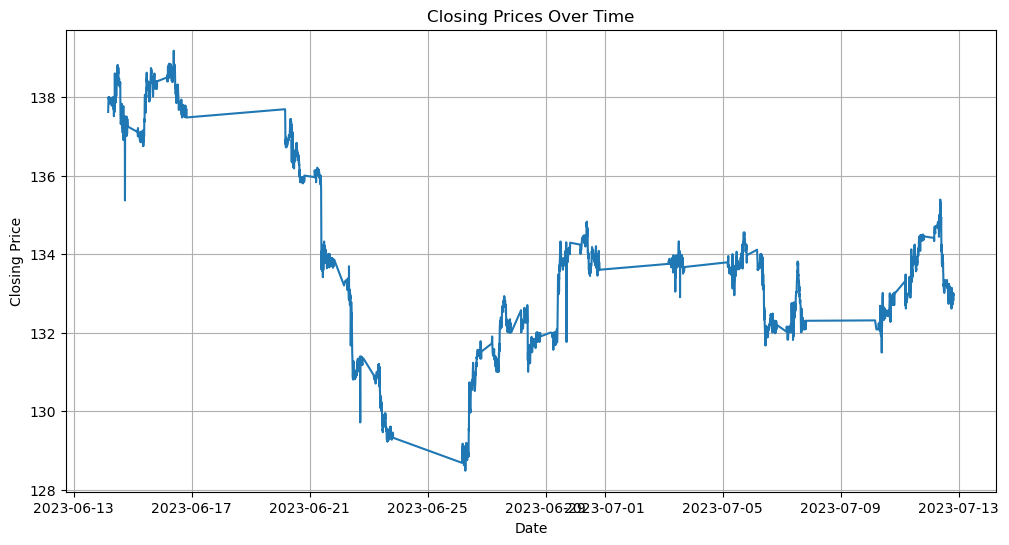

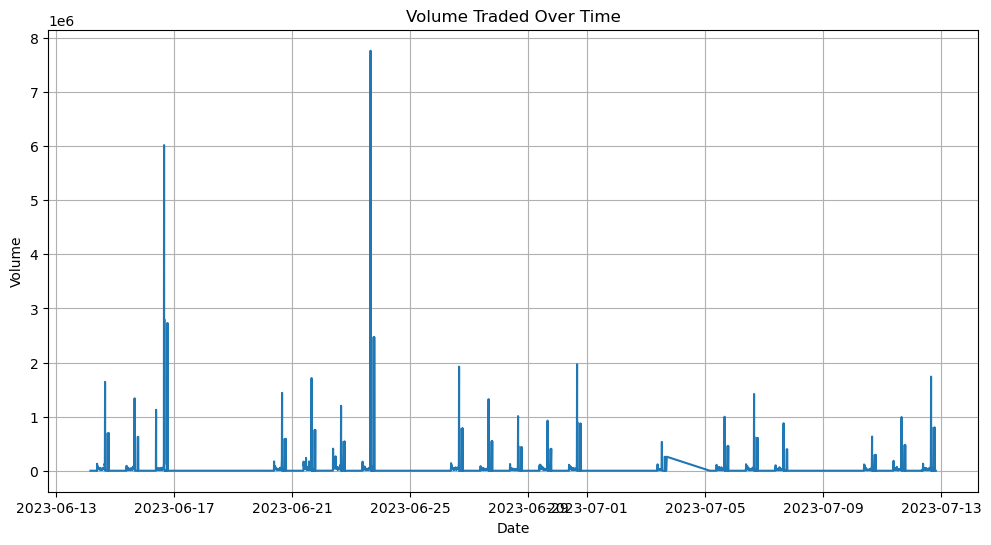

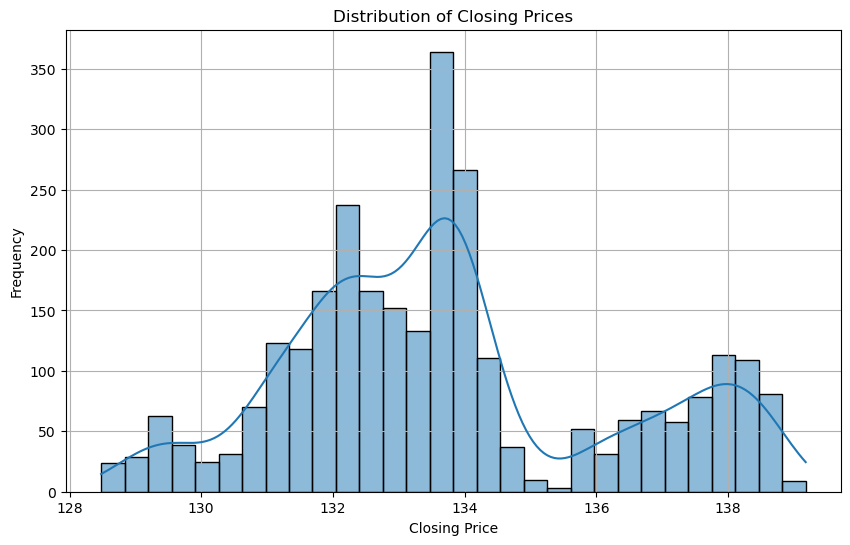

In [6]:
# Additional data analysis tasks
# Visualize the closing prices over time
closing_prices_query = f"SELECT [index], Close FROM {table_name}"
closing_prices = pd.read_sql(closing_prices_query, engine, parse_dates=['index'])
plt.figure(figsize=(12, 6))
plt.plot(closing_prices['index'], closing_prices['Close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Visualize the volume traded over time
volume_query = f"SELECT [index], Volume FROM {table_name}"
volume = pd.read_sql(volume_query, engine, parse_dates=['index'])
plt.figure(figsize=(12, 6))
plt.plot(volume['index'], volume['Volume'])
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Visualize the distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(closing_prices['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()